(image_segmentation.binary_mask_refinement)=
# Binary mask refinement
A typical post-processing step after thresholding is refining binary masks. This step can be crucial to smooth outlines around segmented objects, remove single pixels which were segmented as positive and for filling black holes in white regions.

See also
* [Closing](https://en.wikipedia.org/wiki/Closing_(morphology))

We start with the segmented `embryos_grey.tif` example image. This image is a single-channel crop of an image known from the ImageJ example images.

In [7]:
from skimage.io import imread
from skimage import filters
import matplotlib.pyplot as plt
from skimage.morphology import disk, binary_erosion, binary_dilation, binary_opening, binary_closing
import numpy as np
from scipy.ndimage import binary_fill_holes

Text(0.5, 1.0, 'Binary')

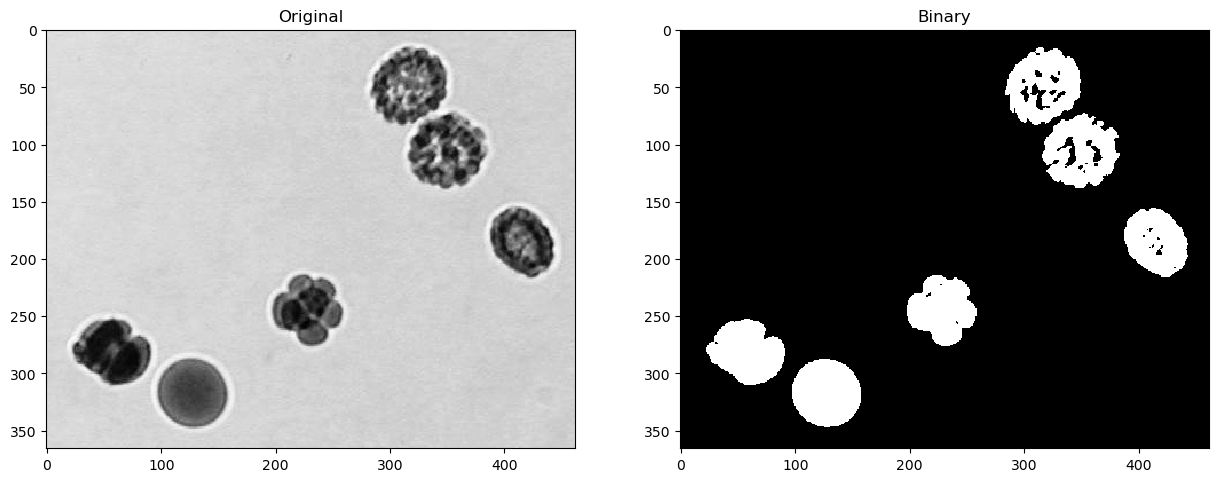

In [2]:
# load image
image = imread("../../data/embryos_grey.tif")

# binarize the image
threshold = filters.threshold_otsu(image)
binary_image = image <= threshold

# Show original image and binary image side-by-side
fig, axs = plt.subplots(1, 2, figsize=(15,15))
cle.imshow(image, plot=axs[0])
axs[0].set_title('Original')

cle.imshow(binary_image, plot=axs[1])
axs[1].set_title('Binary')

## Binary erosion
[Binary erosion](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.binary_erosion) turns white pixels black which have a black neighboring pixel. The neighborhood is defined by a [structuring element](https://scikit-image.org/docs/stable/auto_examples/numpy_operations/plot_structuring_elements.html). Thus, coastlines of the islands are eroded.

Text(0.5, 1.0, 'Eroded r=4')

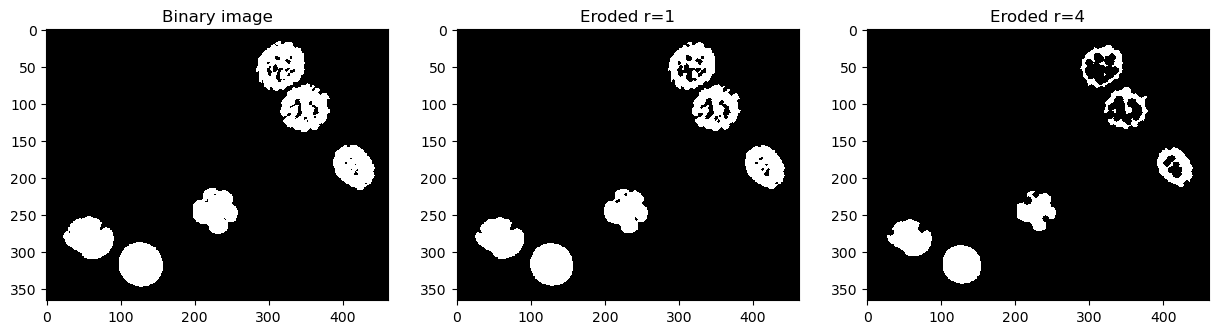

In [3]:
eroded1 = binary_erosion(binary_image, disk(1))
eroded4 = binary_erosion(binary_image, disk(4))

fig, axs = plt.subplots(1, 3, figsize=(15,15))
cle.imshow(binary_image, plot=axs[0])
axs[0].set_title('Binary image')

cle.imshow(eroded1, plot=axs[1])
axs[1].set_title('Eroded r=1')

cle.imshow(eroded4, plot=axs[2])
axs[2].set_title('Eroded r=4')

## Binary dilation
Analogously, dilation turns black pixels white which have a white neighbor.

Text(0.5, 1.0, 'Dilated r=4')

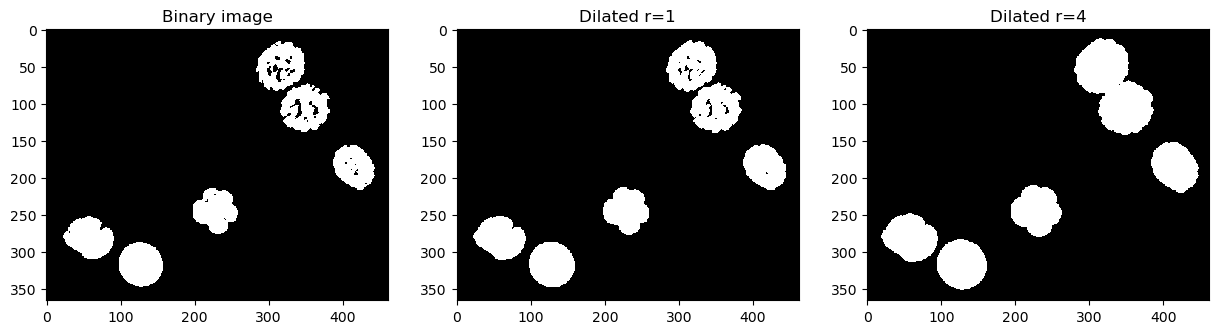

In [4]:
dilated1 = binary_dilation(binary_image, disk(1))
dilated4 = binary_dilation(binary_image, disk(4))

fig, axs = plt.subplots(1, 3, figsize=(15,15))
cle.imshow(binary_image, plot=axs[0])
axs[0].set_title('Binary image')

cle.imshow(dilated1, plot=axs[1])
axs[1].set_title('Dilated r=1')

cle.imshow(dilated4, plot=axs[2])
axs[2].set_title('Dilated r=4')

## Fill holes
Another important operation is [fill holes](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.morphology.binary_fill_holes.html) which is part of the scipy package.

Text(0.5, 1.0, 'Holes filled')

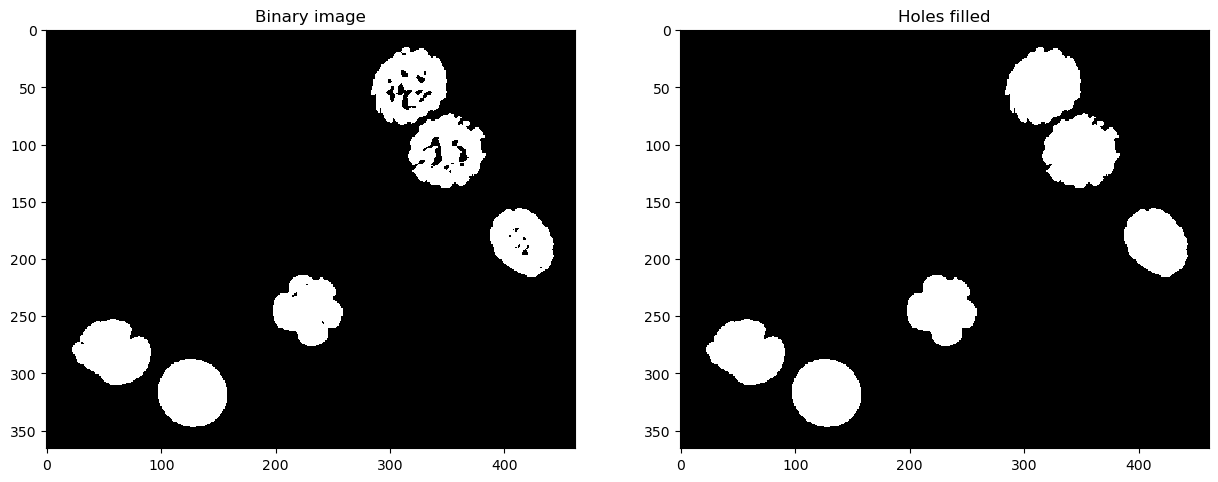

In [5]:
filled = binary_fill_holes(binary_image)

fig, axs = plt.subplots(1, 2, figsize=(15,15))
cle.imshow(binary_image, plot=axs[0])
axs[0].set_title('Binary image')

cle.imshow(filled, plot=axs[1])
axs[1].set_title('Holes filled')

## Binary closing and opening
By combining operations such as erosion and dilation subsequently, one can close and open binary images.

Text(0.5, 1.0, 'Closed')

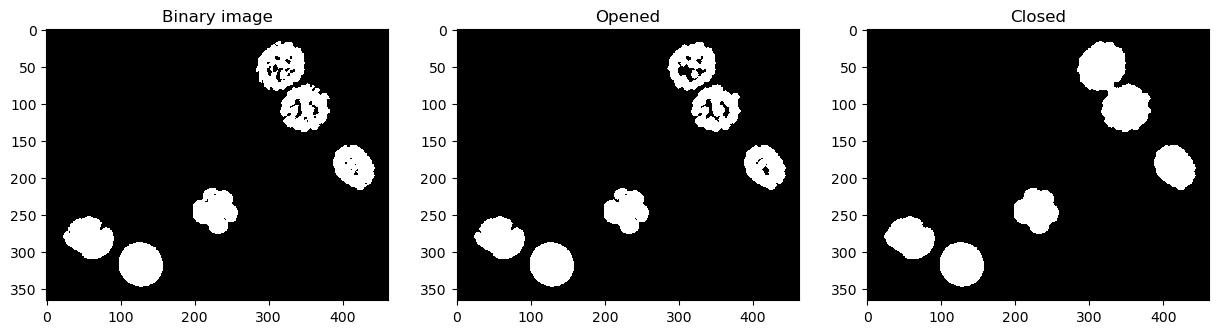

In [8]:
opened = binary_opening(binary_image, disk(4))
closed = binary_closing(binary_image, disk(4))

fig, axs = plt.subplots(1, 3, figsize=(15,15))
cle.imshow(binary_image, plot=axs[0])
axs[0].set_title('Binary image')

cle.imshow(opened, plot=axs[1])
axs[1].set_title('Opened')

cle.imshow(closed, plot=axs[2])
axs[2].set_title('Closed')

## Comparing binary images
For better visualization of differenced between binary images, we would like to subtract one of the two binary images from the other. If we compute the absolute of this image, we should an image, where all pixels are have value `1` where the two binary images have different values. Unfortunately, we cannot subtract binary images with values `True` and `False` using the `-` operator. We first should turn the `True/False` binary images into numeric images. This is possible by using the `astype(int)` method on numpy arrays like this:

```
my_array = my_array.astype(int)
```

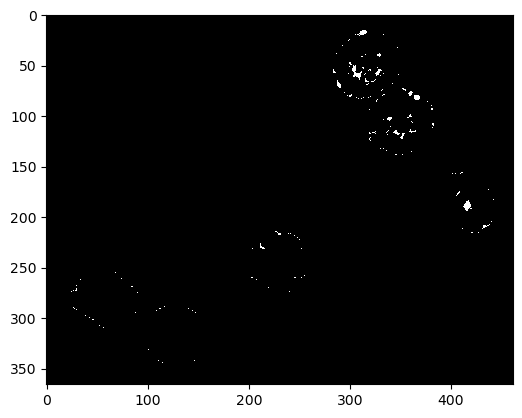

In [10]:
absolute_difference = np.abs(opened.astype(int) - binary_image.astype(int))

cle.imshow(absolute_difference)

## Exercise
In the following code example, `embryos_grey.jpg` is processed using Gaussian filtering and Otsu-thresholding. Process the same `image` only using Otsu-thresholding and binary post-processing operations. Can you achieve the same binary image?

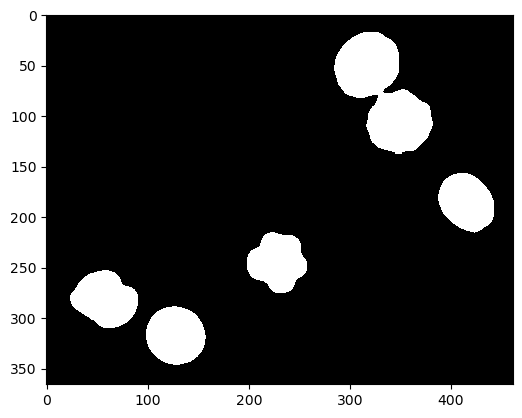

In [11]:
from skimage.io import imread, imshow
image = imread("../../data/embryos_grey.tif")

from skimage import filters

# noise removal
blurred = filters.gaussian(image, sigma=4)

# thresholding
threshold = filters.threshold_otsu(blurred)
binary_image = blurred <= threshold

# result visualization
cle.imshow(binary_image * 1)